In [1]:
import pandas as pd
df = pd.read_csv('/content/sample_data/circle.csv')

In [2]:
df

,Unnamed: 0,feature1,feature2,label_y
0,0,8.660254,-5.00000,0
1,1,8.717792,-4.89899,0
2,2,8.773790,-4.79798,0
3,3,8.828277,-4.69697,0
4,4,8.881281,-4.59596,0
...,...,...,...,...
395,395,-1.969049,-4.59596,1
396,396,-1.714198,-4.69697,1
397,397,-1.406908,-4.79798,1
398,398,-0.999949,-4.89899,1


In [3]:
df = df.drop('Unnamed: 0', axis=1)

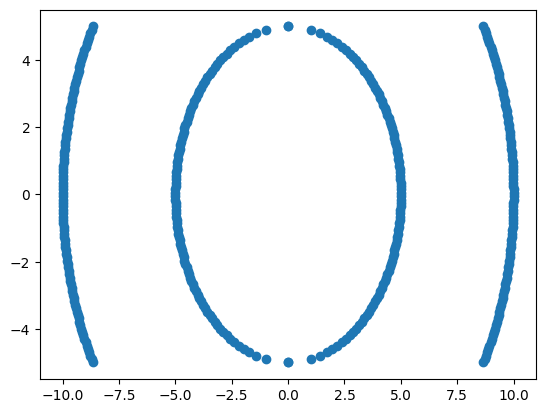

In [4]:
from matplotlib import pyplot as plt
plt.scatter(df.feature1, df.feature2)

In [5]:
df1 = df[df.label_y==0]
df2 = df[df.label_y==1]

In [6]:
df1.shape

(200, 3)

In [7]:
df2.shape

(200, 3)

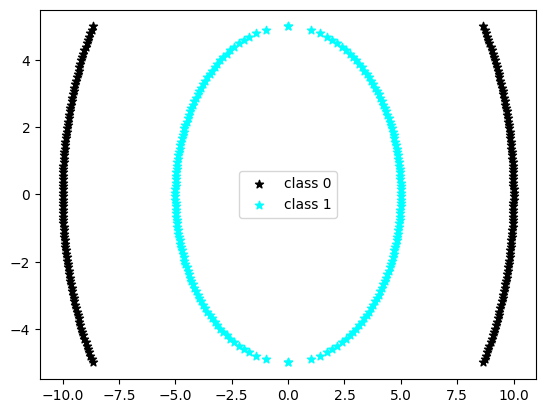

In [8]:
plt.scatter(df1.feature1, df1.feature2, marker='*', color='black', label='class 0')
plt.scatter(df2.feature1, df2.feature2, marker='*', color='cyan', label='class 1')
plt.legend()

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
xtrain, xtest, ytrain, ytest = train_test_split(df[['feature1', 'feature2']], df.label_y, test_size=.30)

In [11]:
xtrain.head()

,feature1,feature2
303,-1.714198,4.696970
172,-9.738311,-2.272727
17,9.445795,-3.282828
335,-4.780671,1.464646
59,9.953852,0.959596


In [12]:
from sklearn.svm import SVC # classifier
from sklearn.svm import SVR #regressor

In [13]:
svm = SVC(kernel='linear') #default = 'rbf'

In [14]:
svm.fit(xtrain, ytrain)

SVC(kernel='linear')

In [15]:
svm.score(xtrain, ytrain) # training accuracy

0.5357142857142857

In [16]:
svm.score(xtest, ytest) #testing score

0.5333333333333333

# Poly

In [17]:
x1 = df['feature1']
x2 = df['feature2']
df['x1_sq'] = df['feature1'] ** 2
df['x2_sq'] = df['feature2'] ** 2
df['x1x2'] = x1 * x2

In [18]:
df.head()

,feature1,feature2,label_y,x1_sq,x2_sq,x1x2
0,8.660254,-5.00000,0,75.000000,25.000000,-43.301270
1,8.717792,-4.89899,0,75.999898,24.000102,-42.708375
2,8.773790,-4.79798,0,76.979390,23.020610,-42.096467
3,8.828277,-4.69697,0,77.938476,22.061524,-41.466150
4,8.881281,-4.59596,0,78.877155,21.122845,-40.818009


In [19]:
x = df.drop('label_y', axis=1)
y = df['label_y']

In [20]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=.30)

In [21]:
xtrain.head()

,feature1,feature2,x1_sq,x2_sq,x1x2
242,4.942275,-0.757576,24.426079,0.573921,-3.744147
18,9.480297,-3.181818,89.876033,10.123967,-30.164582
80,9.513602,3.080808,90.508622,9.491378,29.309582
224,4.285496,-2.575758,18.365473,6.634527,-11.038398
271,4.503737,2.171717,20.283645,4.716355,9.780842


In [22]:
ytrain.head()

242    1
18     0
80     0
224    1
271    1
Name: label_y, dtype: int64

In [23]:
import plotly.express as px
px.scatter_3d(df, x='x1_sq', y='x2_sq', z='x1x2', color='label_y')

In [24]:
svm_lr = SVC(kernel='linear')

In [25]:
svm_lr.fit(xtrain, ytrain)

SVC(kernel='linear')

In [26]:
svm_lr.score(xtest, ytest)

1.0

In [27]:
svm = SVC(kernel='poly')

In [28]:
svm.fit(x,y)

SVC(kernel='poly')

In [29]:
svm.score(x,y)

1.0

In [30]:
svm = SVC(kernel='rbf')

In [31]:
svm.fit(x,y)

SVC()

In [32]:
svm.score(xtest, ytest)

1.0